# K-Means
k개의 클러스터가 주어졌을 때 거리를 기반으로 가장 가까운 클러스터로 할당하는 것을 반복

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("customer.txt",header=0)   #도매업 고객 데이터
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()    #결측치 없음, int 형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
X=df

from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)

X[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

In [6]:
#모형적용
from sklearn import cluster

kmeans=cluster.KMeans(init='k-means++',n_clusters=5,n_init=10)
kmeans.fit(X)
cluster_label=kmeans.labels_
cluster_label    #예측

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 4, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1, 1, 3, 0, 1, 1, 0, 3, 0, 0, 1, 3,
       1, 0, 1, 1, 1, 4, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 3, 3, 4,
       1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0,

In [7]:
df['Cluster']=cluster_label
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


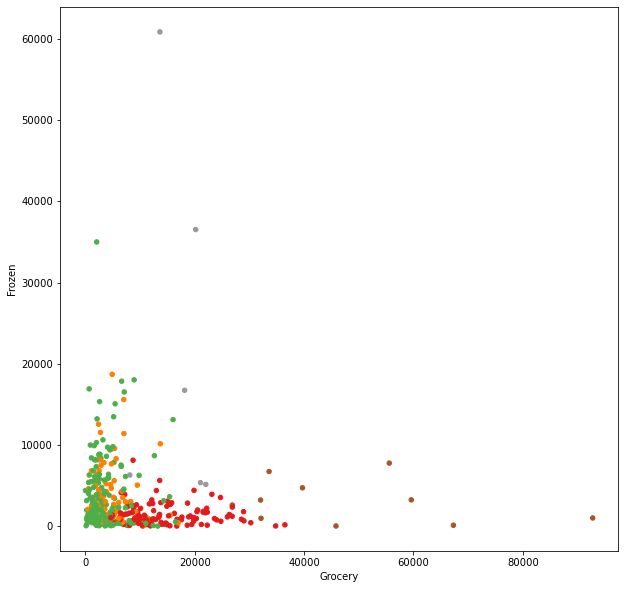

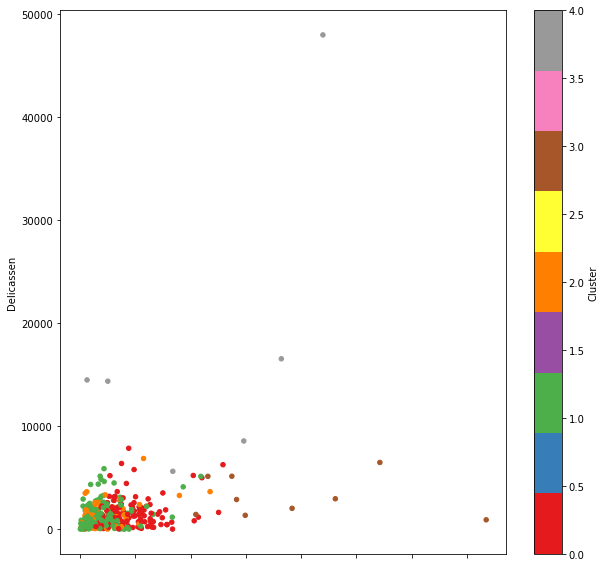

In [8]:
df.plot(kind='scatter',x='Grocery',y='Frozen',c='Cluster',cmap='Set1',colorbar=False,figsize=(10,10))
df.plot(kind='scatter',x='Milk',y='Delicassen',c='Cluster',cmap='Set1',colorbar=True,figsize=(10,10))
plt.show()

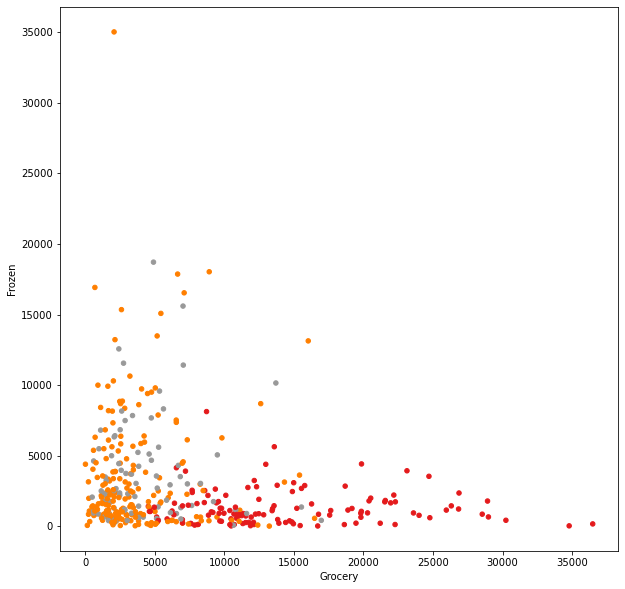

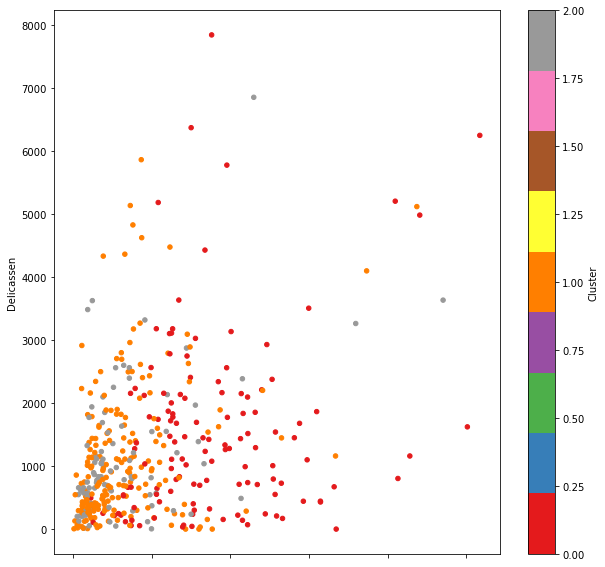

In [9]:
mask=(df['Cluster']==3)|(df['Cluster']==4)
ndf=df[-mask]
ndf.plot(kind='scatter',x='Grocery',y='Frozen',c='Cluster',cmap='Set1',colorbar=False,figsize=(10,10))
ndf.plot(kind='scatter',x='Milk',y='Delicassen',c='Cluster',cmap='Set1',colorbar=True,figsize=(10,10))
plt.show()


# DBSCAN
공간 밀집도를 기준으로 클러스터 구분(코어포인트,경계포인트,아웃라이어)

In [33]:
import os
print(os.getcwd())

C:\Users\user\Desktop\3-1_머신러닝


In [34]:
#중학교 졸업생의 진로현황 데이터
df=pd.read_excel('2016_middle_shcool_graduates_report.xlsx',header=0)
df=df.drop(['Unnamed: 0'],axis=1)

In [35]:
df.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      415 non-null    object 
 1   학교명     415 non-null    object 
 2   코드      415 non-null    int64  
 3   유형      415 non-null    object 
 4   주야      415 non-null    object 
 5   남학생수    415 non-null    int64  
 6   여학생수    415 non-null    int64  
 7   일반고     415 non-null    float64
 8   특성화고    415 non-null    float64
 9   과학고     415 non-null    float64
 10  외고_국제고  415 non-null    float64
 11  예고_체고   415 non-null    float64
 12  마이스터고   415 non-null    float64
 13  자사고     415 non-null    float64
 14  자공고     415 non-null    float64
 15  기타진학    415 non-null    float64
 16  취업      415 non-null    int64  
 17  미상      415 non-null    float64
 18  위도      415 non-null    float64
 19  경도      415 non-null    float64
dtypes: float64(12), int64(4), object(4)
memory usage: 65.0+ KB


In [37]:
df.describe()

,코드,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.0,415.000000,415.000000,415.000000
mean,3.197590,126.532530,116.173494,0.623080,0.149684,0.004378,0.013687,0.017393,0.005251,0.080971,0.034296,0.069571,0.0,0.001670,37.491969,127.032792
std,0.804272,79.217906,76.833082,0.211093,0.102977,0.006739,0.011548,0.092006,0.007557,0.079136,0.080302,0.235630,0.0,0.003697,0.348926,0.265245
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,34.979940,126.639561
25%,3.000000,80.000000,71.500000,0.566500,0.065500,0.000000,0.006000,0.000000,0.000000,0.027000,0.000000,0.000000,0.0,0.000000,37.501934,126.921758
50%,3.000000,129.000000,118.000000,0.681000,0.149000,0.000000,0.012000,0.005000,0.003000,0.060000,0.000000,0.007000,0.0,0.000000,37.547702,127.013579
75%,3.000000,177.500000,161.500000,0.758000,0.224500,0.006000,0.019000,0.011000,0.007000,0.111500,0.019000,0.015000,0.0,0.003000,37.590670,127.071265
max,9.000000,337.000000,422.000000,0.908000,0.477000,0.055000,0.110000,0.940000,0.046000,0.485000,0.531000,1.000000,0.0,0.036000,37.694777,129.106974


In [38]:
!pip install folium
import folium
mschool_map=folium.Map(location=[37.55,126.98],tiles='Stamen Terrain',zoom_start=12)
for name,lat,lng in zip(df.학교명,df.위도,df.경도):
    folium.CircleMarker([lat,lng],
                        radius=5,
                        color='brown',
                        fill=True,
                        fill_color='coral',
                        fill_opacity=0.7,
                        popup=name
                       ).add_to(mschool_map)
mschool_map

In [39]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()
df['location']=label_encoder.fit_transform(df['지역'])
df['code']=label_encoder.fit_transform(df['코드'])
df['type']=label_encoder.fit_transform(df['유형'])
df['day']=label_encoder.fit_transform(df['주야'])

df.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,...,자공고,기타진학,취업,미상,위도,경도,location,code,type,day
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,...,0.000,0.004,0,0.000,37.594942,127.038909,16,0,1,0
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,...,0.004,0.031,0,0.000,37.577473,127.003857,22,0,1,0
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,...,0.003,0.009,0,0.003,37.491637,127.071744,0,0,0,0
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,...,0.000,0.019,0,0.000,37.480439,127.062201,0,0,0,0
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,...,0.000,0.010,0,0.000,37.510750,127.008900,14,0,0,0


In [40]:
from sklearn import cluster

column_list=[9,10,13]
X=df.iloc[:,column_list]
print(X[:5])

X=preprocessing.StandardScaler().fit(X).transform(X)
dbm=cluster.DBSCAN(eps=0.2,min_samples=5)

dbm.fit(X)
cluster_label=dbm.labels_
print(cluster_label)

     과학고  외고_국제고    자사고
0  0.018   0.007  0.227
1  0.000   0.035  0.043
2  0.009   0.012  0.090
3  0.013   0.013  0.065
4  0.007   0.010  0.282
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  2 -1  0 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0  3 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1  0
 -1 -1 -1  0 -1 -1 -1 -1  0 -1  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1
 -1 -1  0 -1 -1 -1  0  2  0  0  0  0  0 -1 -1 -1  0 -1  0 -1 -1  0 -1  0
 -1  0  0 -1 -1 -1 -1  1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0  1 -1
 -1  0  2  0 -1 -1  1 -1 -1 -1  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1
 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  0 -1  0  0 -1 -1
 -1 -1 -1  0 -1 -1 -1  1  0  3  1 -1  0  0 -1  0 -1 -1  0  0  2 -1 -1  3
  0  0 -1 -1 -1 -1  0 -1  0  0 -1  0  0  0 -1 -1  0 -1 -1 -1 -1 -1  2  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1  3  0  2 -1 -1
 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  1 -1  

In [41]:
df['cluster']=cluster_label
df.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,...,기타진학,취업,미상,위도,경도,location,code,type,day,cluster
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,...,0.004,0,0.000,37.594942,127.038909,16,0,1,0,-1
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,...,0.031,0,0.000,37.577473,127.003857,22,0,1,0,-1
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,...,0.009,0,0.003,37.491637,127.071744,0,0,0,0,-1
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,...,0.019,0,0.000,37.480439,127.062201,0,0,0,0,-1
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,...,0.010,0,0.000,37.510750,127.008900,14,0,0,0,-1


과고, 외고국제고, 자사고 ver

In [42]:
grouped_cols=[0,1,3]+column_list
grouped=df.groupby('cluster')
for key,group in grouped:
    print('*key:',key)
    print('*number:',len(group))
    print(group.iloc[:,grouped_cols].head())
    print("\n")
    
colors={-1:'gray',0:'coral',1:'blue',2:'green',3:'red',4:'purple',5:'orange',6:'brown',7:'brick',8:'yellow',9:'magenta',10:'cyan'}
cluster_map=folium.Map(location=[37.55,126.98],tiles='Stamen Terrain',zoom_start=12)

for name,lat,lng,clus in zip(df.학교명,df.위도,df.경도,df.cluster):
    folium.CircleMarker([lat,lng],
                       radius=5,
                       color=colors[clus],
                       fill=True,
                       fill_colors=colors[clus],
                       fill_opacity=0.7,
                       popup=name).add_to(cluster_map)
cluster_map

*key: -1
*number: 255
    지역               학교명  유형    과학고  외고_국제고    자사고
0  성북구    서울대학교사범대학부설중학교  국립  0.018   0.007  0.227
1  종로구  서울대학교사범대학부설여자중학교  국립  0.000   0.035  0.043
2  강남구             개원중학교  공립  0.009   0.012  0.090
3  강남구             개포중학교  공립  0.013   0.013  0.065
4  서초구             경원중학교  공립  0.007   0.010  0.282


*key: 0
*number: 102
     지역      학교명  유형  과학고  외고_국제고    자사고
13  서초구  동덕여자중학교  사립  0.0   0.022  0.038
22  강남구    수서중학교  공립  0.0   0.019  0.044
28  서초구    언남중학교  공립  0.0   0.015  0.050
34  강남구    은성중학교  사립  0.0   0.016  0.065
43  송파구    거원중학교  공립  0.0   0.021  0.054


*key: 1
*number: 45
       지역      학교명  유형  과학고  외고_국제고    자사고
46    강동구    동신중학교  사립  0.0     0.0  0.044
103   양천구    신원중학교  공립  0.0     0.0  0.006
118   구로구    개봉중학교  공립  0.0     0.0  0.012
126  영등포구    대림중학교  공립  0.0     0.0  0.050
175   중랑구  혜원여자중학교  사립  0.0     0.0  0.004


*key: 2
*number: 8
      지역    학교명  유형    과학고  외고_국제고    자사고
20   서초구  서초중학교  공립  0.003   0.013  0.085
79   강동구  한영중학교  사

과고, 외고국제고, 자사고 + 설립 유형

In [46]:
column_list2=[9,10,13,22]
X2=df.iloc[:,column_list2]
print(X2[:5])
print("\n")

X2=preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2=cluster.DBSCAN(eps=0.2,min_samples=5)
dbm2.fit(X2)
df['cluster2']=dbm2.labels_

grouped2_cols=[0,1,3]+column_list2
grouped2=df.groupby('cluster2')
for key, group in grouped2:
    print('*key:',key)
    print('*number:',len(group))
    print(group.iloc[:,grouped2_cols].head())
    print("\n")
    
cluster2_map=folium.Map(location=[37.55,126.98],tiles='Stamen Terrain',zoom_start=12)

for name,lat,lng,clus in zip(df.학교명,df.위도,df.경도,df.cluster2):
    folium.CircleMarker([lat,lng],
                       radius=5,
                       color=colors[clus],
                       fill=True,
                       fill_colors=colors[clus],
                       fill_opacity=0.7,
                       popup=name).add_to(cluster2_map)
cluster2_map
    

     과학고  외고_국제고    자사고  type
0  0.018   0.007  0.227     1
1  0.000   0.035  0.043     1
2  0.009   0.012  0.090     0
3  0.013   0.013  0.065     0
4  0.007   0.010  0.282     0


*key: -1
*number: 281
    지역               학교명  유형    과학고  외고_국제고    자사고  type
0  성북구    서울대학교사범대학부설중학교  국립  0.018   0.007  0.227     1
1  종로구  서울대학교사범대학부설여자중학교  국립  0.000   0.035  0.043     1
2  강남구             개원중학교  공립  0.009   0.012  0.090     0
3  강남구             개포중학교  공립  0.013   0.013  0.065     0
4  서초구             경원중학교  공립  0.007   0.010  0.282     0


*key: 0
*number: 8
      지역    학교명  유형  과학고  외고_국제고    자사고  type
22   강남구  수서중학교  공립  0.0   0.019  0.044     0
43   송파구  거원중학교  공립  0.0   0.021  0.054     0
51   송파구  방이중학교  공립  0.0   0.021  0.068     0
93   강서구  방원중학교  공립  0.0   0.019  0.057     0
164  중랑구  원묵중학교  공립  0.0   0.020  0.062     0


*key: 1
*number: 59
     지역    학교명  유형  과학고  외고_국제고    자사고  type
28  서초구  언남중학교  공립  0.0   0.015  0.050     0
47  강동구  둔촌중학교  공립  0.0   0.010  0.026     0


과고,외고국제고 ver